# In blackjack, the probability of being dealt an Ace in a single game is 7.69% (p = 0.0769). If a player plays five independent games, what is the probability of getting exactly two Aces in those five games, and what is the probability that the player gets their first Ace on the third game?

Variable: do i have a aces or not
One simulation will be to allow the machine play and check if it gets a aces or not in case that at the beggining it gets a ace at the beginning will be a succes and in case that it get none it will be a failure.
The only assuption wil be that the persentage of getting aces is 7.69% because theorecally that is what will be.

In [1]:
!pip install ale-py
!pip install gymnasium
!pip install 'gymnasium[atari]'
!pip install gymnasium[accept-rom-licence]

ERROR: Invalid requirement: "'gymnasium[atari]'": Expected package name at the start of dependency specifier
    'gymnasium[atari]'
    ^


In [1]:
import ale_py
import gymnasium as gym

# Register the ALE environments
gym.register_envs(ale_py)

# Now check the registry
gym.pprint_registry()

===== classic_control =====
Acrobot-v1                  CartPole-v0                 CartPole-v1
MountainCar-v0              MountainCarContinuous-v0    Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0          phys2d/CartPole-v1          phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3            BipedalWalkerHardcore-v3    CarRacing-v3
LunarLander-v3              LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1                CliffWalking-v1             CliffWalkingSlippery-v1
FrozenLake-v1               FrozenLake8x8-v1            Taxi-v3
===== tabular =====
tabular/Blackjack-v0        tabular/CliffWalking-v0
===== None =====
Ant-v2                      Ant-v3                      GymV21Environment-v0
GymV26Environment-v0        HalfCheetah-v2              HalfCheetah-v3
Hopper-v2                   Hopper-v3                   Humanoid-v2
Humanoid-v3                 HumanoidStandup-v2          InvertedDoublePendulum-v2
InvertedPendulum-v2         Pusher-v2             

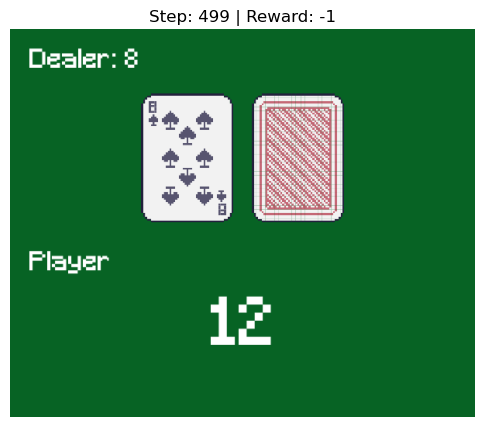

In [2]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time

# Create environment
env = gym.make('Blackjack-v1', render_mode='rgb_array')
observation, info = env.reset()

# Create figure
fig, ax = plt.subplots(figsize=(6, 8))
ax.axis('off')

total_reward = 0

for step in range(500):
    # Take action
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    
    # Clear and update display
    clear_output(wait=True)
    ax.clear()
    ax.imshow(env.render())
    ax.set_title(f"Step: {step} | Reward: {total_reward:.0f}")
    ax.axis('off')
    
    display(fig)
    
    # Add delay to make it visible (adjust this value)
    time.sleep(0.03)  # 30ms delay = ~33 fps
    
    # Reset if game over
    if terminated or truncated:
        observation, info = env.reset()
        total_reward = 0

plt.close()
env.close()

🎯 BLACKJACK ACE SIMULATION RESULTS 🎯
Total simulations: 100
Total games played: 500
Total Aces drawn: 37 (7.40%)
Runs with exactly 2 Aces: 5 (5.00%)
Runs where first Ace appeared on 3rd game: 8 (8.00%)


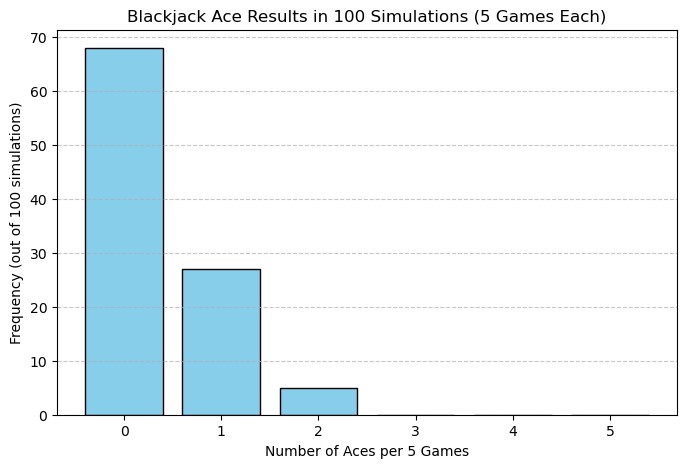

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation settings
p = 0.0769           # Probability of getting an Ace
games_per_run = 5    # Number of games in each run
simulations = 100    # Total simulations

# Tracking results
aces_per_run = []          # Number of Aces per 5-game simulation
double_aces_count = 0      # Count of runs with exactly two Aces
first_ace_on_3rd = 0       # Count of runs where first Ace appears on 3rd game
total_aces = 0

# Run simulations
for _ in range(simulations):
    results = np.random.choice([1, 0], size=games_per_run, p=[p, 1-p])
    aces = np.sum(results)
    aces_per_run.append(aces)
    total_aces += aces

    # Count double Aces (exactly 2 in a 5-game run)
    if aces == 2:
        double_aces_count += 1

    # Check if the first Ace appeared on the 3rd game
    # (only if there's at least one Ace in the run)
    if 1 in results and np.where(results == 1)[0][0] == 2:
        first_ace_on_3rd += 1

# Calculate percentages
double_aces_percent = (double_aces_count / simulations) * 100
first_ace_on_3rd_percent = (first_ace_on_3rd / simulations) * 100
ace_rate = (total_aces / (simulations * games_per_run)) * 100

# Display results
print("🎯 BLACKJACK ACE SIMULATION RESULTS 🎯")
print(f"Total simulations: {simulations}")
print(f"Total games played: {simulations * games_per_run}")
print(f"Total Aces drawn: {total_aces} ({ace_rate:.2f}%)")
print(f"Runs with exactly 2 Aces: {double_aces_count} ({double_aces_percent:.2f}%)")
print(f"Runs where first Ace appeared on 3rd game: {first_ace_on_3rd} ({first_ace_on_3rd_percent:.2f}%)")

# Bar chart of Aces per run
plt.figure(figsize=(8,5))
plt.hist(aces_per_run, bins=range(0, 7), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title("Blackjack Ace Results in 100 Simulations (5 Games Each)")
plt.xlabel("Number of Aces per 5 Games")
plt.ylabel("Frequency (out of 100 simulations)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

🎯 BLACKJACK ACE SIMULATION RESULTS 🎯
Total simulations: 1000
Total games played: 5000
Total Aces drawn: 365 (7.30%)
Runs with exactly 2 Aces: 48 (4.80%)
Runs where first Ace appeared on 3rd game: 51 (5.10%)


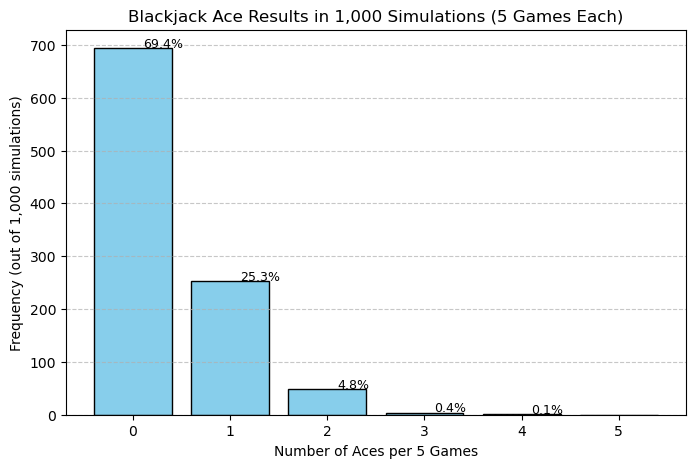

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation settings
p = 0.0769           # Probability of getting an Ace
games_per_run = 5    # Number of games in each run
simulations = 1000   # Total simulations

# Tracking results
aces_per_run = []          # Number of Aces per 5-game simulation
double_aces_count = 0      # Count of runs with exactly two Aces
first_ace_on_3rd = 0       # Count of runs where first Ace appears on 3rd game
total_aces = 0

# Run simulations
for _ in range(simulations):
    results = np.random.choice([1, 0], size=games_per_run, p=[p, 1-p])
    aces = np.sum(results)
    aces_per_run.append(aces)
    total_aces += aces

    # Count double Aces (exactly 2 in a 5-game run)
    if aces == 2:
        double_aces_count += 1

    # Check if the first Ace appeared on the 3rd game
    # (only if there's at least one Ace in the run)
    if 1 in results and np.where(results == 1)[0][0] == 2:
        first_ace_on_3rd += 1

# Calculate percentages
double_aces_percent = (double_aces_count / simulations) * 100
first_ace_on_3rd_percent = (first_ace_on_3rd / simulations) * 100
ace_rate = (total_aces / (simulations * games_per_run)) * 100

# Display results
print("🎯 BLACKJACK ACE SIMULATION RESULTS 🎯")
print(f"Total simulations: {simulations}")
print(f"Total games played: {simulations * games_per_run}")
print(f"Total Aces drawn: {total_aces} ({ace_rate:.2f}%)")
print(f"Runs with exactly 2 Aces: {double_aces_count} ({double_aces_percent:.2f}%)")
print(f"Runs where first Ace appeared on 3rd game: {first_ace_on_3rd} ({first_ace_on_3rd_percent:.2f}%)")

# Bar chart of Aces per run
plt.figure(figsize=(8,5))
counts, bins, patches = plt.hist(aces_per_run, bins=range(0, 7), align='left', rwidth=0.8,
                                 color='skyblue', edgecolor='black')
plt.title("Blackjack Ace Results in 1,000 Simulations (5 Games Each)")
plt.xlabel("Number of Aces per 5 Games")
plt.ylabel("Frequency (out of 1,000 simulations)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels above bars
for count, x in zip(counts, bins):
    if count > 0:
        plt.text(x + 0.1, count + 2, f"{(count/simulations)*100:.1f}%", fontsize=9)

plt.show()

If the probability of drawing an Ace is( p = 0.0769), we can expect to see approximately 0.3845 Aces in 5 games. This implies that, on average, there will be nearly 0.4 Aces for every 5 games played. On average, it will take about 13 games to encounter the first Ace.

The probability of getting exactly 2 Aces in 5 games is about 4.65%. Additionally, the chance that the first Ace appears on the 3rd game is around 6.55%.

In 100 simulations, about 5% of the trials resulted in exactly 2 Aces, and 8% showed that the first Ace appeared in the third game. When we increased the number of simulations to 1,000, approximately 4.80% resulted in 2 Aces, and 5.10% had the first Ace appear on the third game. These results align with the expected probabilities, and the minor differences are attributed to the natural random variation that occurs in smaller samples.